In [1]:
import numpy as np
from PIL import Image
from fcmeans import FCM

Image Source: Photo by <a href="https://unsplash.com/@stefanuzz86?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">stefano d'andrea</a> on <a href="https://unsplash.com/s/photos/nature-landscape?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>
<br>
Reference:
https://pypi.org/project/fuzzy-c-means/
<br>
Script Source:
https://github.com/omadson/fuzzy-c-means/tree/master/examples


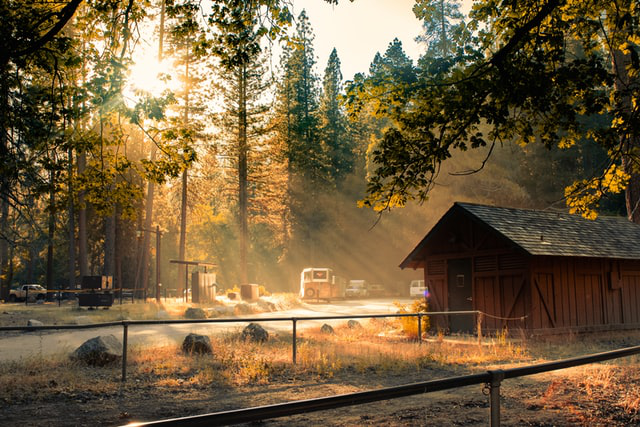

In [2]:
image = Image.open('../Data/Image/stefano-d-andrea-UXIsw4vK1gM-unsplash-2.jpg')
N, M = image.size                                  
image

In [3]:
#Transforming image into a data set
X = (
    np.asarray(image)                              # convert a PIL image to np array
    .reshape((N*M, 3))                             # reshape the image to convert each pixel to an instance of a data set
)


In [4]:
#Creating and fitting the model
fcm = FCM(n_clusters=10)                           # create a FCM instance with 10 clusters
fcm.fit(X)

In [5]:
#Pixel quantization
labeld_X = fcm.predict(X)                          # get the label of each data point
transformed_X = fcm.centers[labeld_X]              # pixel quantization into the centers

In [6]:
#Converting and saving image
quatized_array = (
    transformed_X
    .astype('uint8')                               # convert data points into 8-bit unsigned integers
    .reshape((M, N, 3))                            # reshape image
)

quatized_image = Image.fromarray(np.asarray(quatized_array))   # convert array into a PIL image object
quatized_image.save('../Data/Image/newImage_10colors.jpg') # save image

In [16]:
#Final Compressed Image

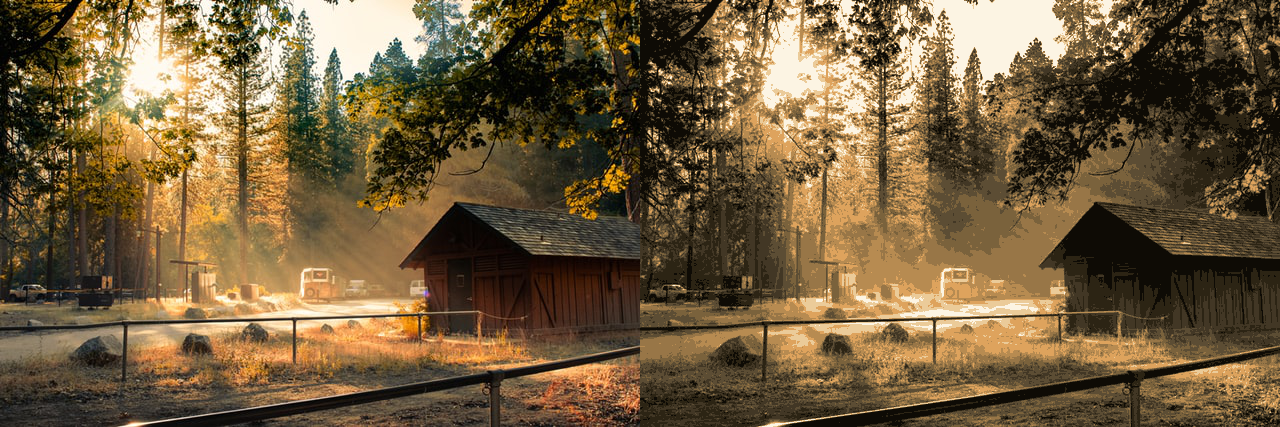

In [17]:
side_by_side = Image.fromarray(
    np.hstack([
        np.array(image),
        np.array(quatized_image)
    ])
)
side_by_side